Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Cleaned Dataset Preview:
   Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0           3.35           5.59     

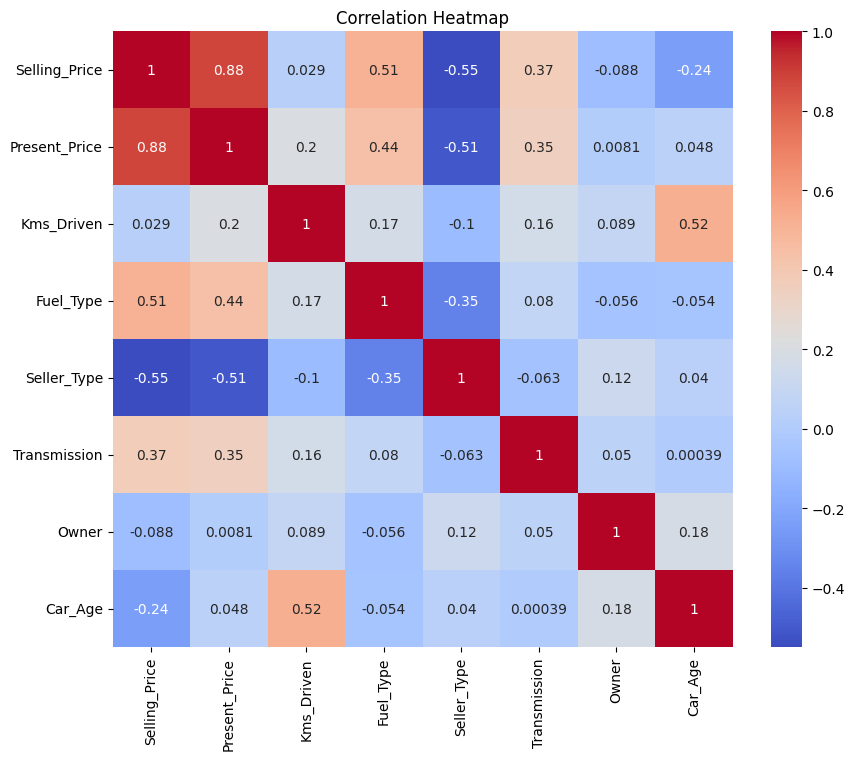


Model Performance:
R2 Score: 0.9582648830157845
Mean Absolute Error: 0.6463672131147542

Predicted Selling Price:
5.75 Lakhs


C:\Users\hasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("car_data.csv")

# View first 5 rows
print("Dataset Preview:")
print(df.head())


# ==============================
# 3. Data Cleaning & Feature Engineering
# ==============================

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop Car_Name
df.drop('Car_Name', axis=1, inplace=True)

# Convert Year to Car Age
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

# Encode categorical features
df['Fuel_Type'] = df['Fuel_Type'].map({
    'Petrol': 0,
    'Diesel': 1,
    'CNG': 2
})

df['Seller_Type'] = df['Seller_Type'].map({
    'Dealer': 0,
    'Individual': 1
})

df['Transmission'] = df['Transmission'].map({
    'Manual': 0,
    'Automatic': 1
})

print("\nCleaned Dataset Preview:")
print(df.head())


# ==============================
# 4. Exploratory Data Analysis (EDA)
# ==============================

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# ==============================
# 5. Train-Test Split
# ==============================

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ==============================
# 6. Train Random Forest Model
# ==============================

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# 7. Model Evaluation
# ==============================

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


# ==============================
# 8. Predict Selling Price for New Car
# ==============================

# Example input:
# Car_Age = 5
# Present_Price = 7.5
# Kms_Driven = 30000
# Fuel_Type = Petrol (0)
# Seller_Type = Individual (1)
# Transmission = Manual (0)
# Owner = 0

new_car = pd.DataFrame({
    'Present_Price': [7.5],
    'Kms_Driven': [30000],
    'Fuel_Type': [0],
    'Seller_Type': [1],
    'Transmission': [0],
    'Owner': [0],
    'Car_Age': [5]
})

predicted_price = model.predict(new_car)


print("\nPredicted Selling Price:")
print(f"{round(predicted_price[0], 2)} Lakhs")
